# Smart scanning
This Jupyter is to simulate different operations of a smart scanner.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from smart_scan.helpers.function_helpers import mask2active_pixels, generate_mask, ScanningStragies
import ipywidgets as widgets
from PIL import Image
from smart_scan.devices import Galvo_Scanners

In [ ]:
# Load a mask
im = Image.open('resources/Mask_big_2.tif')
mask = np.array(im)

# For testing. Max size of the ones mask tested: 2048 x 2048
#mask = np.ones([2048,2048])

h = mask.shape[0]
w = mask.shape[1]
ps = 102.4 / h # pixel size so that the total field of view is ~ 100 x 100 µm2

print(f"Mask is {h}x{w} pixels; pixelsize = {ps}µm. Total field of view: {h*ps} x {w*ps} µm^2")

Mask is 2048x2048 pixels; pixelsize = 0.05µm. Total field of view: 102.4 x 102.4 µm^2


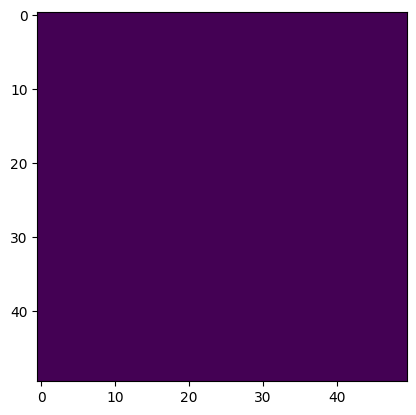

In [3]:
# Show the mask
plt.imshow(mask)

In [30]:
# Create the Galvo_Scanners object
gs = Galvo_Scanners()

In [31]:
# Connects it
gs.connect()

In [33]:
# Scans the non-zero pixels of the mask
#gs.scan_triggered(mask=mask,pixelsize=ps,scan_strategy= ScanningStragies.SNAKE,duration=1)
gs.scan(mask=mask,pixelsize=ps,scan_strategy= ScanningStragies.SNAKE,duration=5, triggered=True, timeout=10)

Scaling: UINT16
Scaling: UINT16
Waiting for trigger...
Final Play Position: iPlay_x=4194304, iPlay_y=4194304
Data Size: data_x.size=4194304, data_y.size=4194304


In [34]:
# Disconnects the device
gs.disconnect()

### The following was used to check every function then used in the Galvo_Scanners class

In [5]:
# 1: define the image and mask sizes
semidim_w = 5 # pixels
semidim_h = 9 # pixels

# 2a: generate a binary mask to know where we want to scan
# h = 100 # pixels
# w = 100 # pixels
# mask = generate_mask(h,w, semidim_h, semidim_w)

# 2b load a mask
mask = imarray
h = mask.shape[0]
w = mask.shape[1]

# 3: convert the mask to active pixels, so be sent to the controller
pixel_sequence = mask2active_pixels(mask, scan_strategy=ScanningStragies.RASTER)

# 4: convert the pixels in voltages
voltage_sequence = gs._pixels2voltages(pixel_sequence = pixel_sequence)


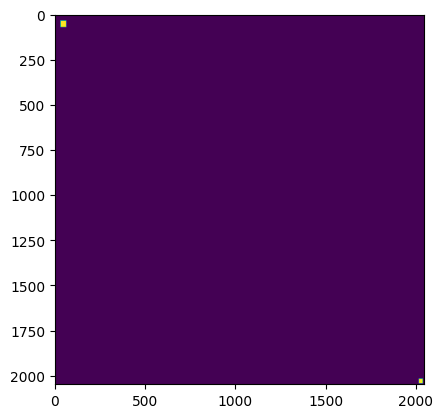

In [6]:
plt.imshow(mask)

In [18]:
tmp_mask = np.zeros([h,w,len(pixel_sequence)])
for idx, pixel in enumerate(pixel_sequence):
    tmp_mask[pixel[0],pixel[1],idx] = 1
    
# Threshold and show the image
slice = widgets.IntSlider(description='slice',min = 0, max = len(pixel_sequence)-1)

def show_scan(slice):
    data = tmp_mask[:,:,slice]
    fig = plt.imshow(data)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

def show_voltage(slice):
    print(f'Voltage_x [mV]: {voltage_sequence[slice][1]}')
    print(f'Voltage_y [mV]: {voltage_sequence[slice][0]}')
    

    
scan = widgets.interactive_output(show_scan, {'slice': slice})
voltage = widgets.interactive_output(show_voltage, {'slice': slice})
widgets.HBox([ widgets.VBox([slice, scan]), voltage ]) 


In [35]:
data_x = np.transpose(voltage_sequence)[0].copy()
data_y = np.transpose(voltage_sequence)[1].copy()

#calculated properties
max_voltage = 5000 #[mv]
min_voltage = 0

# Limits the voltage output
data_x[data_x>=max_voltage] = max_voltage
data_x[data_x<=min_voltage] = min_voltage
data_y[data_y>=max_voltage] = max_voltage
data_y[data_y<=min_voltage] = min_voltage

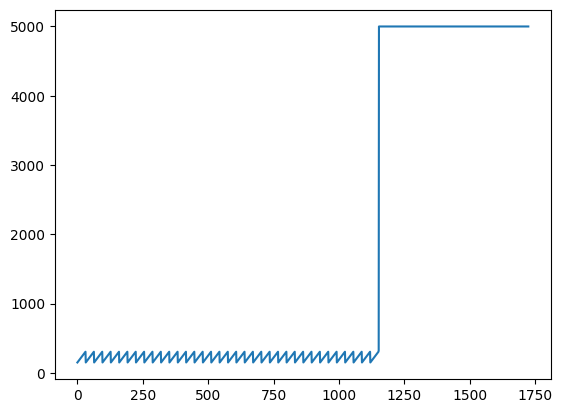

In [36]:
# Plot the voltage over time
plt.plot(data_y)
# plt.xlim([0,100])

In [32]:



# AnalogOut expects double normalized to +/-1 value
data_x *= (2**16-1)/max_voltage
data_x = np.uint16(data_x)


data_y *= (2**15-1)/max_voltage
data_y = np.uint16(data_y)

n_samples = len(data_x)
# The duration of the whole scan
duration = 1 # s
dwell_time = duration / n_samples
rate = n_samples/duration # Hz

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint16') with casting rule 'same_kind'

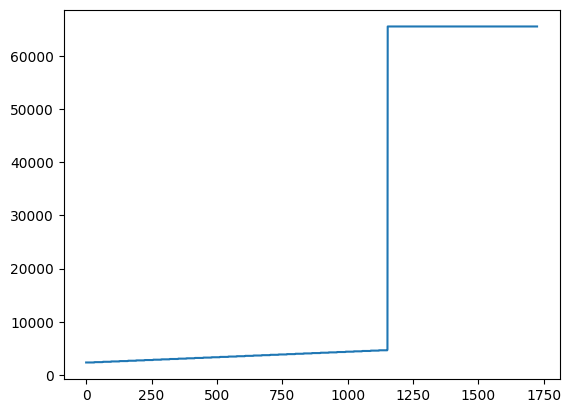

In [34]:
plt.plot(data_x)


In [17]:
# Drive the device
#output_voltages(data_x, data_y, rate)
#output_voltages_triggered(data_x, data_y, rate, timeout=5)